In [ ]:
!sudo apt -y install libportaudio2
!pip install -q tflite-model-maker

In [ ]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

In [ ]:
data = DataLoader.from_folder("/content/drive/MyDrive/Colab Notebooks/flower_photos")
train_data, test_data = data.split(0.9)

In [ ]:
model = image_classifier.create(train_data)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             3413024   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 18)                23058     
                                                                 
Total params: 3,436,082
Trainable params: 23,058
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5
457/457 [==============================] - 1614s 4s/step - loss: 1.3085 - accuracy: 0.7629
Epoch 2/5
457/457 [==============================] - 604s 1s/step - loss: 1.0280 - accuracy: 0.8698
Epoch 3/5
457/457 [==============

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             3413024   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 18)                23058     
                                                                 
Total params: 3,436,082
Trainable params: 23,058
Non-trainable params: 3,413,024
_________________________________________________________________


In [ ]:
loss, accuracy = model.evaluate(test_data)

51/51 [==============================] - 202s 3s/step - loss: 0.9478 - accuracy: 0.8920


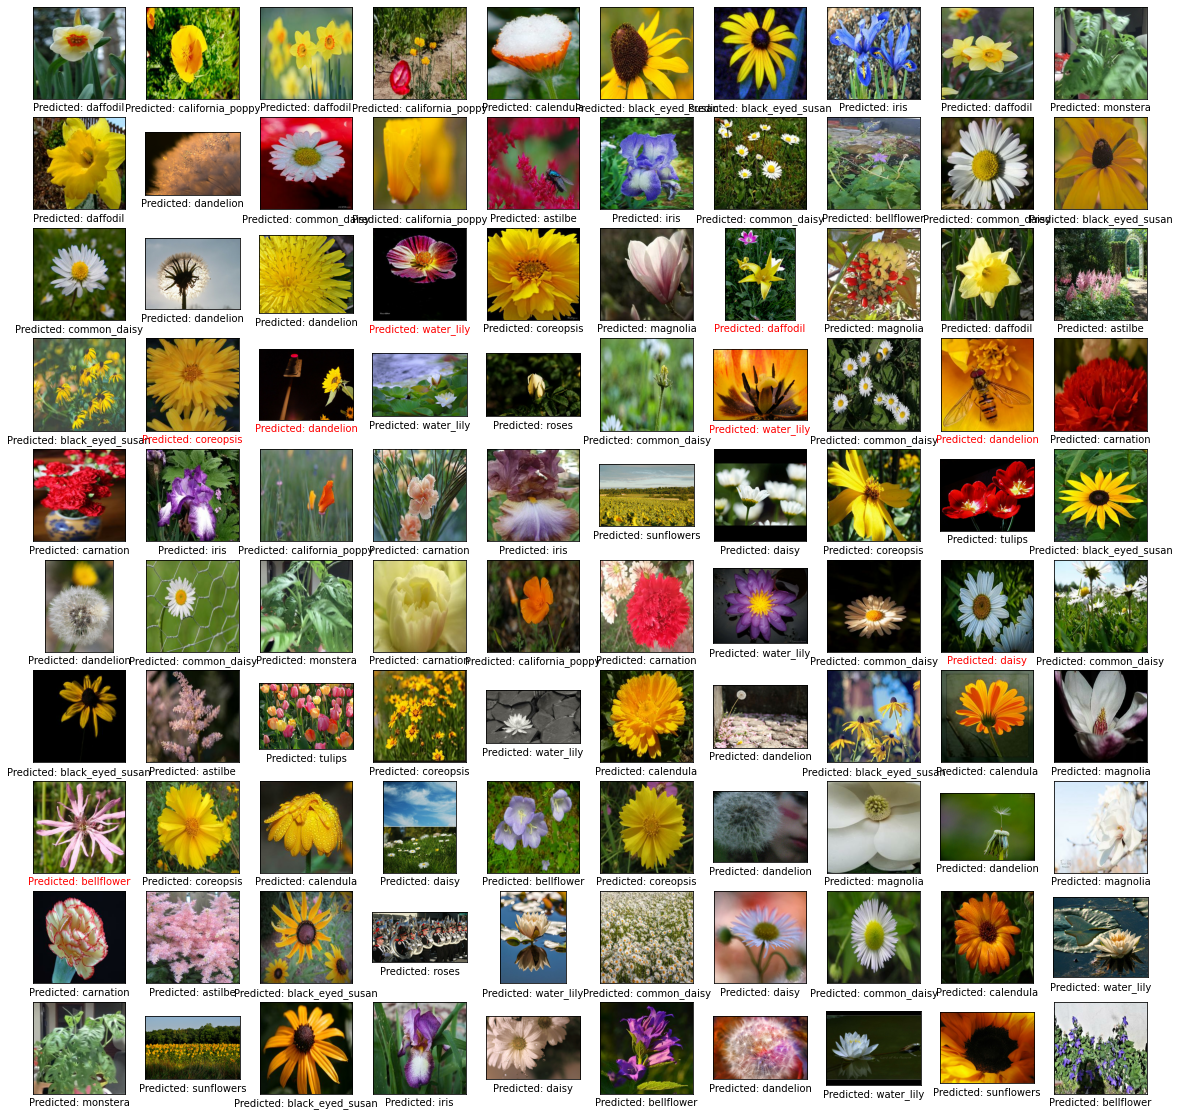

In [ ]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [ ]:
model.export(export_dir='/content/drive/MyDrive/Colab Notebooks/2022/SeoulTech/Mobile Programming/팀플')

/usr/local/lib/python3.7/dist-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


In [ ]:
interpreter = tf.lite.Interpreter(model_path="/content/drive/MyDrive/Colab Notebooks/2022/SeoulTech/Mobile Programming/팀플/model.tflite")
interpreter.allocate_tensors()

# Print input shape and type
inputs = interpreter.get_input_details()
print('{} input(s):'.format(len(inputs)))
for i in range(0, len(inputs)):
    print('{} {}'.format(inputs[i]['shape'], inputs[i]['dtype']))

# Print output shape and type
outputs = interpreter.get_output_details()
print('\n{} output(s):'.format(len(outputs)))
for i in range(0, len(outputs)):
    print('{} {}'.format(outputs[i]['shape'], outputs[i]['dtype']))

1 input(s):
[  1 224 224   3] <class 'numpy.uint8'>

1 output(s):
[ 1 18] <class 'numpy.uint8'>


In [ ]:
config = QuantizationConfig.for_float16()

In [ ]:
model.export(export_dir='/content/drive/MyDrive/Colab Notebooks/2022/SeoulTech/Mobile Programming/팀플', tflite_filename='model_fp16.tflite', quantization_config=config)

In [ ]:
interpreter = tf.lite.Interpreter(model_path="/content/drive/MyDrive/Colab Notebooks/2022/SeoulTech/Mobile Programming/팀플/model_fp16.tflite")
interpreter.allocate_tensors()

# Print input shape and type
inputs = interpreter.get_input_details()
print('{} input(s):'.format(len(inputs)))
for i in range(0, len(inputs)):
    print('{} {}'.format(inputs[i]['shape'], inputs[i]['dtype']))

# Print output shape and type
outputs = interpreter.get_output_details()
print('\n{} output(s):'.format(len(outputs)))
for i in range(0, len(outputs)):
    print('{} {}'.format(outputs[i]['shape'], outputs[i]['dtype']))

1 input(s):
[  1 224 224   3] <class 'numpy.float32'>

1 output(s):
[ 1 18] <class 'numpy.float32'>
